# K Means clustering

Unsupervised learning/classification

In [27]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
dfincome = pd.read_csv('C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/data/income.csv')
dfincome.head(2)

,name,age,income
0,Rob,27,70000
1,Michael,29,90000


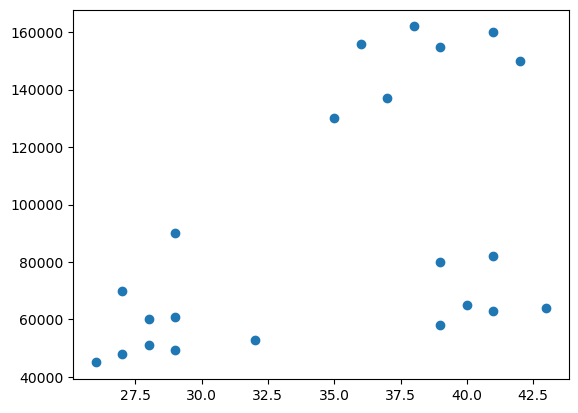

In [29]:
plt.scatter(dfincome.age, dfincome.income)

In [30]:
km = KMeans(n_clusters=3, n_init=10)
km

KMeans(n_clusters=3, n_init=10)

In [31]:
y_predicted = km.fit_predict(dfincome[['age', 'income']])
y_predicted

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [32]:
dfincome['cluster'] = y_predicted
dfincome.head()

,name,age,income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


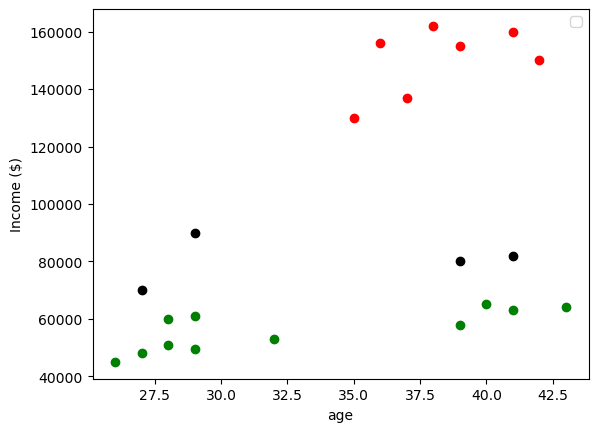

In [33]:
df1 = dfincome[dfincome.cluster==0]
df2 = dfincome[dfincome.cluster==1]
df3 = dfincome[dfincome.cluster==2]


plt.scatter(df1.age, df1.income, color = 'green')
plt.scatter(df2.age, df2.income, color = 'red')
plt.scatter(df3.age, df3.income, color = 'black')

plt.xlabel('age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

In [38]:
scaler = MinMaxScaler()
scaler.fit(dfincome[['income']])
dfincome['income'] = scaler.transform(dfincome[['income']])

scaler.fit(dfincome[['age']])
dfincome['age'] = scaler.transform(dfincome[['age']])


In [40]:
y_predicted = km.fit_predict(dfincome[['age', 'income']])

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
dfincome['cluster'] = y_predicted


,name,age,income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [44]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

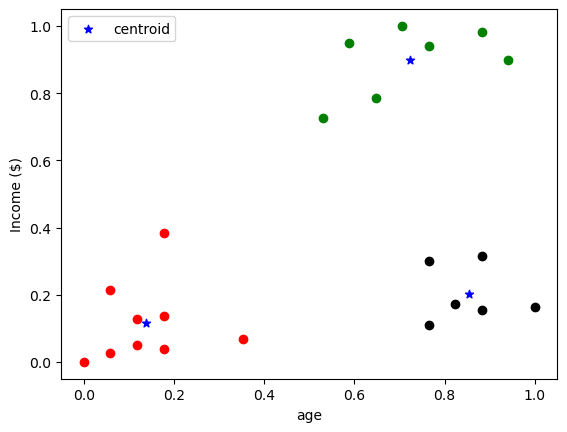

In [47]:
df1 = dfincome[dfincome.cluster==0]
df2 = dfincome[dfincome.cluster==1]
df3 = dfincome[dfincome.cluster==2]


plt.scatter(df1.age, df1.income, color = 'green')
plt.scatter(df2.age, df2.income, color = 'red')
plt.scatter(df3.age, df3.income, color = 'black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
             color = 'blue', marker= '*', label= 'centroid')
plt.xlabel('age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

## Elbow plot method/screeplot

In [50]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(dfincome[['age', 'income']])
    sse.append(km.inertia_) # gives the SSE

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

In [51]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.26217927623452125,
 0.21066678488010518,
 0.16858512236029757,
 0.14087951725103115,
 0.10383752586603559]

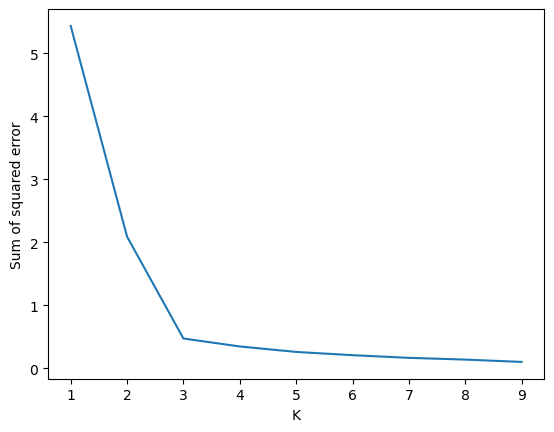

In [52]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)